Jupyter Notebook to accompany the analysis of Project 4

In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

# Germany

## Germany Daily Sequences Histogram

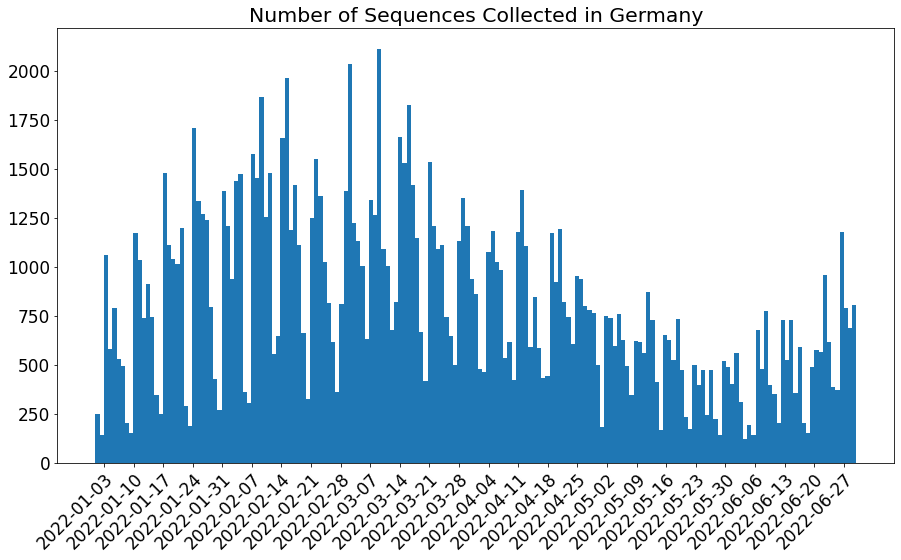

In [4]:
dates_sequences_df = pd.read_csv("Germany/dates_sequences_Germany_220101_220630.csv")
dates_sequences_df = dates_sequences_df.sort_values("date")

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.xticks(rotation=90)
plt.title("Number of Sequences Collected in Germany")
plt.rc('font', size=20) 
dates_sequences_df["date"].hist(bins=len(dates_sequences_df["date"].unique()), grid=False, ax=ax)
new_labels = []
for i in range(2,len(dates_sequences_df["date"].unique()),7):
    new_labels.append(dates_sequences_df["date"].unique()[i])
ax.set(xticks=np.arange(2, len(dates_sequences_df["date"].unique()), 7))
ax.set_xticklabels(new_labels,rotation=45,ha='right', rotation_mode='anchor')

print("")

# France

# France Daily Sequences Histograms

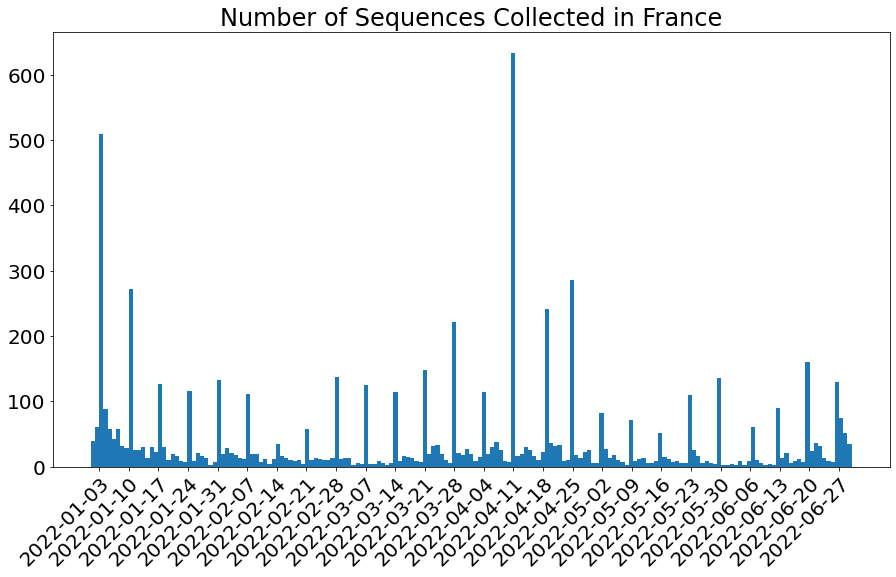

In [5]:
dates_sequences_df = pd.read_csv("France/dates_sequences_France_220101_220630.csv")
dates_sequences_df = dates_sequences_df.sort_values("date")

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.xticks(rotation=90)
plt.title("Number of Sequences Collected in France")
plt.rc('font', size=17) 
dates_sequences_df["date"].hist(bins=len(dates_sequences_df["date"].unique()), grid=False, ax=ax)
new_labels = []
for i in range(2,len(dates_sequences_df["date"].unique()),7):
    new_labels.append(dates_sequences_df["date"].unique()[i])
ax.set(xticks=np.arange(2, len(dates_sequences_df["date"].unique()), 7))
ax.set_xticklabels(new_labels,rotation=45,ha='right', rotation_mode='anchor')
print("")

## France Daily Estimation

In [7]:
# Input: France Weekly Cases .csv file
france_df = pd.read_csv("France/france_new_cases_2022_owid.csv")

# 7 day rolling average
window_size = 7
rolling_average = np.convolve(france_df["new_cases"], np.ones(window_size)/window_size, mode='valid')
padding = (window_size - 1) // 2
rolling_average = np.pad(rolling_average, (padding, padding), mode='constant', constant_values=np.nan)
france_df["daily_cases_rolling"] = rolling_average

france_df.to_csv("France/reported_cases_France_220101_221225.csv", sep=',')

# Spain

## Spain Daily Sequences Histogram

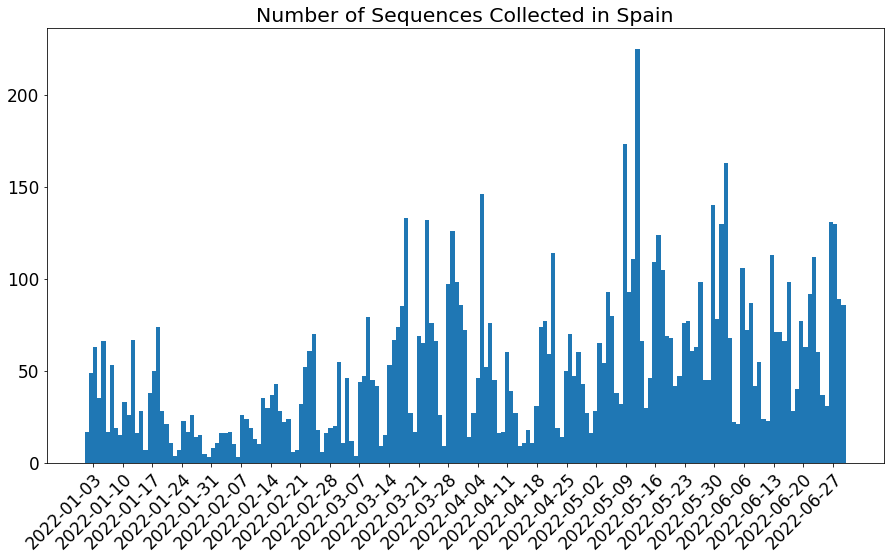

In [8]:
dates_sequences_df = pd.read_csv("Spain/dates_sequences_Spain_220101_220630.csv")
dates_sequences_df = dates_sequences_df.sort_values("date")

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.xticks(rotation=90)
plt.title("Number of Sequences Collected in Spain")
plt.rc('font', size=17) 
dates_sequences_df["date"].hist(bins=len(dates_sequences_df["date"].unique()), grid=False, ax=ax)
new_labels = []
for i in range(2,len(dates_sequences_df["date"].unique()),7):
    new_labels.append(dates_sequences_df["date"].unique()[i])
ax.set(xticks=np.arange(2, len(dates_sequences_df["date"].unique()), 7))
ax.set_xticklabels(new_labels,rotation=45,ha='right', rotation_mode='anchor')
print("")

## Spain Daily Estimate

In [9]:
# Import data from Google Open Covid19 Data
data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv")

In [10]:
spain_df = data[data["location_key"] == "ES"]

# Obtain dates of interest 
spain_df["date"] = pd.to_datetime(spain_df["date"])
spain_df = spain_df[(spain_df['date'] >= '2022-01-01') & (spain_df['date'] < '2022-07-03')]
spain_df = spain_df[["date","new_confirmed"]]
spain_df["week"] = spain_df["date"].dt.isocalendar().week

# The daily reporting data after June 13th is abnormal - was receiving updates every 3-4 days.
# So, will implement rolling average for the last half month of June 
window_size = 7
rolling_average = np.convolve(spain_df["new_confirmed"], np.ones(window_size)/window_size, mode='valid')
padding = (window_size - 1) // 2
rolling_average = np.pad(rolling_average, (padding, padding), mode='constant', constant_values=np.nan)
spain_df["new_confirmed"][163:] = rolling_average[163:]
spain_df = spain_df.dropna()

spain_df.to_csv("Spain/reported_cases_Spain_220101_220630.csv", sep=',')

<ipython-input-10-7d95123c4f9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_df["date"] = pd.to_datetime(spain_df["date"])
<ipython-input-10-7d95123c4f9c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_df["new_confirmed"][163:] = rolling_average[163:]


# India

## India Daily Sequences Histogram

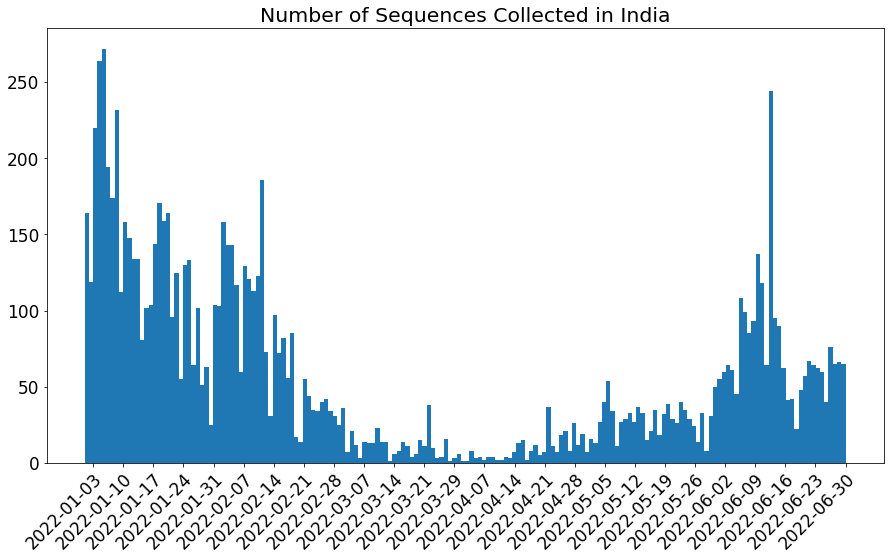

In [14]:
dates_sequences_df = pd.read_csv("India/dates_sequences_India_220101_220630.csv")
dates_sequences_df = dates_sequences_df.sort_values("date")

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.xticks(rotation=90)
plt.title("Number of Sequences Collected in India")
plt.rc('font', size=17) 
dates_sequences_df["date"].hist(bins=len(dates_sequences_df["date"].unique()), grid=False, ax=ax)
new_labels = []
for i in range(2,len(dates_sequences_df["date"].unique()),7):
    new_labels.append(dates_sequences_df["date"].unique()[i])
ax.set(xticks=np.arange(2, len(dates_sequences_df["date"].unique()), 7))
ax.set_xticklabels(new_labels,rotation=45,ha='right', rotation_mode='anchor')
print("")

## India Daily Estimate

In [ ]:
# Import data from Google Open Covid19 Data
data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv")

In [16]:
# Select for India
india_df = data[data["location_key"] == "IN"]

# Obtain dates of interest 
india_df["date"] = pd.to_datetime(india_df["date"])
india_df = india_df[(india_df['date'] >= '2022-01-01') & (india_df['date'] < '2022-07-01')]
india_df = india_df[["date","new_confirmed"]]

india_df.to_csv("India/reported_cases_India_220101_220630.csv", sep=',')

<ipython-input-16-9b2387d098a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df["date"] = pd.to_datetime(india_df["date"])
